The experiments were run with the following command:
```sh
dvc exp run --queue \
    -S dataset.path='bdsaglam/musique-2hop' \
    -S qa.model='llama-3-70b-tgi,gpt-4o,gpt-3.5-turbo' \
    -S qa.prompt='standard,cot-zs,cot-fs,cte' \
    -S run='1'
```

In [1]:
import json
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
from bellek.dvc.experiment import load_experiments

experiments = load_experiments('ablation-llm-2hop-subset.json')
print(f"{len(experiments)} experiments")
experiments[0]

13 experiments


{'commit': 'workspace',
 'id': 'workspace',
 'name': None,
 'params': {'dataset': {'path': 'bdsaglam/musique-2hop',
   'name': 'answerable',
   'split': 'validation'},
  'qa': {'prompt': 'standard', 'model': 'llama-3-70b-tgi', 'temperature': 0.1},
  'run': 1},
 'metrics': {'exact_match': 0.5, 'f1': 0.6599999999999999, 'fuzzy_match': 0.7}}

In [3]:
df = (
    pd.json_normalize(experiments)
    .sort_values(["params.qa.model", "params.qa.prompt", "params.qa.temperature", "params.run"])
    .drop(columns=["commit", "id"])
    .drop_duplicates()
    .reset_index(drop=True)
)
mask = df["params.dataset.path"] == "bdsaglam/musique-2hop"
df = df.loc[mask].copy()
df

,name,params.dataset.path,params.dataset.name,params.dataset.split,params.qa.prompt,params.qa.model,params.qa.temperature,params.run,metrics.exact_match,metrics.f1,metrics.fuzzy_match
0,hulky-dent,bdsaglam/musique-2hop,answerable,validation,cot-fs,gpt-3.5-turbo,0.1,1,0.551917,0.692852,0.629393
1,ruddy-harl,bdsaglam/musique-2hop,answerable,validation,cot-zs,gpt-3.5-turbo,0.1,1,0.536741,0.670746,0.607029
2,winey-belt,bdsaglam/musique-2hop,answerable,validation,cte,gpt-3.5-turbo,0.1,1,0.575080,0.707971,0.654153
3,lated-yegg,bdsaglam/musique-2hop,answerable,validation,standard,gpt-3.5-turbo,0.1,1,0.405751,0.487911,0.456869
4,nubby-hake,bdsaglam/musique-2hop,answerable,validation,cot-fs,gpt-4o,0.1,1,0.607827,0.737075,0.686102
5,apeak-salt,bdsaglam/musique-2hop,answerable,validation,cot-zs,gpt-4o,0.1,1,0.561502,0.699257,0.644569
6,cross-typo,bdsaglam/musique-2hop,answerable,validation,cte,gpt-4o,0.1,1,0.655751,0.782515,0.735623
7,dumpy-tams,bdsaglam/musique-2hop,answerable,validation,standard,gpt-4o,0.1,1,0.595847,0.739225,0.682907
8,focal-hose,bdsaglam/musique-2hop,answerable,validation,cot-fs,llama-3-70b-tgi,0.1,1,0.498403,0.582141,0.546326
9,split-ludo,bdsaglam/musique-2hop,answerable,validation,cot-zs,llama-3-70b-tgi,0.1,1,0.495208,0.583063,0.543930


In [4]:
metric_cols = [col for col in df.columns if col.startswith("metrics.")]

In [5]:
df.drop(
    columns=["name", "params.dataset.path", "params.dataset.name", "params.dataset.split"]
).groupby(["params.qa.model", "params.qa.prompt", "params.qa.temperature"]).aggregate(["mean", "max", "count"]).loc[:, metric_cols]

metrics.exact_match  \
                                                                      mean   
params.qa.model params.qa.prompt params.qa.temperature                       
gpt-3.5-turbo   cot-fs           0.1                              0.551917   
                cot-zs           0.1                              0.536741   
                cte              0.1                              0.575080   
                standard         0.1                              0.405751   
gpt-4o          cot-fs           0.1                              0.607827   
                cot-zs           0.1                              0.561502   
                cte              0.1                              0.655751   
                standard         0.1                              0.595847   
llama-3-70b-tgi cot-fs           0.1                              0.498403   
                cot-zs           0.1                              0.495208   
                cte              0.1                              0.652556   
                standard         0.1                              0.543930   

                                                                        \
                                                             max count   
params.qa.model params.qa.prompt params.qa.temperature                   
gpt-3.5-turbo   cot-fs           0.1                    0.551917     1   
                cot-zs           0.1                    0.536741     1   
                cte              0.1                    0.575080     1   
                standard         0.1                    0.405751     1   
gpt-4o          cot-fs           0.1                    0.607827     1   
                cot-zs           0.1                    0.561502     1   
                cte              0.1                    0.655751     1   
                standard         0.1                    0.595847     1   
llama-3-70b-tgi cot-fs           0.1                    0.498403     1   
                cot-zs           0.1                    0.495208     1   
                cte              0.1                    0.652556     1   
                standard         0.1                    0.587859     2   

                                                       metrics.f1            \
                                                             mean       max   
params.qa.model params.qa.prompt params.qa.temperature                        
gpt-3.5-turbo   cot-fs           0.1                     0.692852  0.692852   
                cot-zs           0.1                     0.670746  0.670746   
                cte              0.1                     0.707971  0.707971   
                standard         0.1                     0.487911  0.487911   
gpt-4o          cot-fs           0.1                     0.737075  0.737075   
                cot-zs           0.1                     0.699257  0.699257   
                cte              0.1                     0.782515  0.782515   
                standard         0.1                     0.739225  0.739225   
llama-3-70b-tgi cot-fs           0.1                     0.582141  0.582141   
                cot-zs           0.1                     0.583063  0.583063   
                cte              0.1                     0.753282  0.753282   
                standard         0.1                     0.675889  0.691778   

                                                              \
                                                       count   
params.qa.model params.qa.prompt params.qa.temperature         
gpt-3.5-turbo   cot-fs           0.1                       1   
                cot-zs           0.1                       1   
                cte              0.1                       1   
                standard         0.1                       1   
gpt-4o          cot-fs           0.1                       1   
                cot-zs           0.1                       1   
           

In [6]:
# Average metrics over repeated runs (params.run)
df_avg = (
    df.groupby(["params.qa.model", "params.qa.prompt", "params.qa.temperature"])[
        ["metrics.exact_match", "metrics.f1", "metrics.fuzzy_match"]
    ]
    .mean()
    .reset_index()
)
df_avg

,params.qa.model,params.qa.prompt,params.qa.temperature,metrics.exact_match,metrics.f1,metrics.fuzzy_match
0,gpt-3.5-turbo,cot-fs,0.1,0.551917,0.692852,0.629393
1,gpt-3.5-turbo,cot-zs,0.1,0.536741,0.670746,0.607029
2,gpt-3.5-turbo,cte,0.1,0.575080,0.707971,0.654153
3,gpt-3.5-turbo,standard,0.1,0.405751,0.487911,0.456869
4,gpt-4o,cot-fs,0.1,0.607827,0.737075,0.686102
5,gpt-4o,cot-zs,0.1,0.561502,0.699257,0.644569
6,gpt-4o,cte,0.1,0.655751,0.782515,0.735623
7,gpt-4o,standard,0.1,0.595847,0.739225,0.682907
8,llama-3-70b-tgi,cot-fs,0.1,0.498403,0.582141,0.546326
9,llama-3-70b-tgi,cot-zs,0.1,0.495208,0.583063,0.543930


In [7]:
prompt_order = ['standard', 'cot-zs', 'cot-fs', 'cte']
df_avg['params.qa.prompt'] = pd.Categorical(df_avg['params.qa.prompt'], categories=prompt_order, ordered=True)
df_avg = df_avg.sort_values('params.qa.prompt')
df_avg

,params.qa.model,params.qa.prompt,params.qa.temperature,metrics.exact_match,metrics.f1,metrics.fuzzy_match
3,gpt-3.5-turbo,standard,0.1,0.405751,0.487911,0.456869
7,gpt-4o,standard,0.1,0.595847,0.739225,0.682907
11,llama-3-70b-tgi,standard,0.1,0.543930,0.675889,0.675479
1,gpt-3.5-turbo,cot-zs,0.1,0.536741,0.670746,0.607029
5,gpt-4o,cot-zs,0.1,0.561502,0.699257,0.644569
9,llama-3-70b-tgi,cot-zs,0.1,0.495208,0.583063,0.543930
0,gpt-3.5-turbo,cot-fs,0.1,0.551917,0.692852,0.629393
4,gpt-4o,cot-fs,0.1,0.607827,0.737075,0.686102
8,llama-3-70b-tgi,cot-fs,0.1,0.498403,0.582141,0.546326
2,gpt-3.5-turbo,cte,0.1,0.575080,0.707971,0.654153


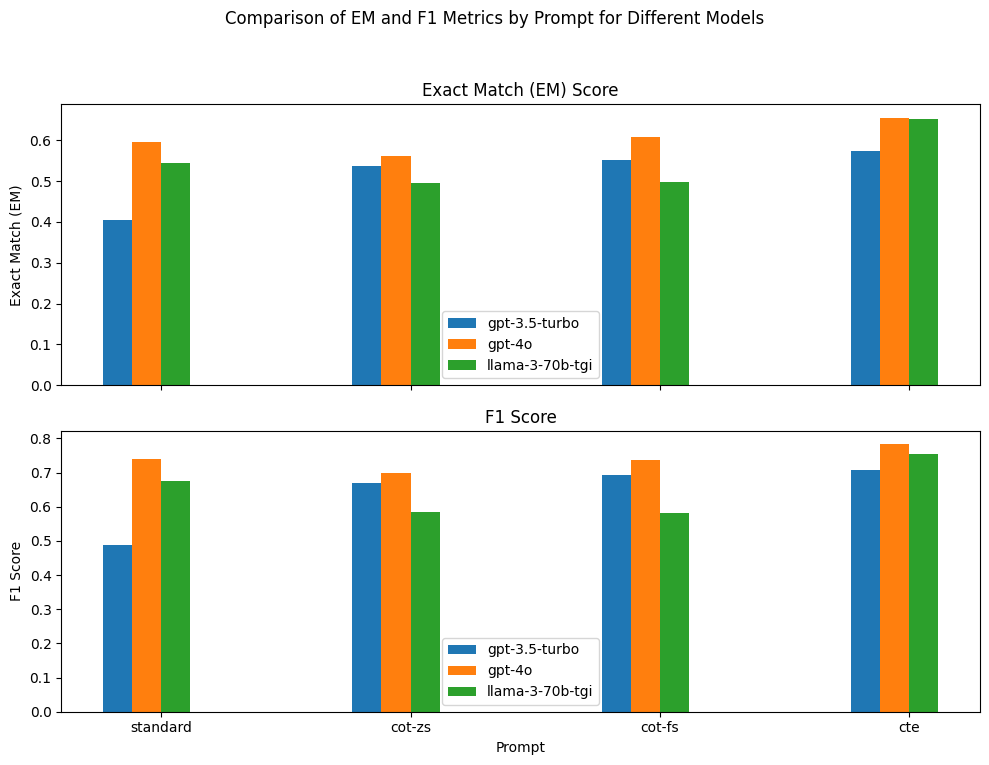

In [8]:
# Get unique models and prompts
models = df_avg['params.qa.model'].unique()
prompts = df_avg['params.qa.prompt'].unique()

# Set up the figure and axes
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
fig.suptitle('Comparison of EM and F1 Metrics by Prompt for Different Models')

x = np.arange(len(prompts))
width = 0.35 / len(models)  # Adjust width based on the number of models

# Plot EM and F1 scores for each model
for i, model in enumerate(models):
    model_df = df_avg[df_avg['params.qa.model'] == model]
    ax[0].bar(x + (i - len(models) / 2) * width, model_df['metrics.exact_match'], width, label=model)
    ax[1].bar(x + (i - len(models) / 2) * width, model_df['metrics.f1'], width, label=model)

# Set labels and titles for EM scores plot
ax[0].set_ylabel('Exact Match (EM)')
ax[0].set_title('Exact Match (EM) Score')
ax[0].set_xticks(x)
ax[0].set_xticklabels(prompts)
ax[0].legend(loc='best')

# Set labels and titles for F1 scores plot
ax[1].set_xlabel('Prompt')
ax[1].set_ylabel('F1 Score')
ax[1].set_title('F1 Score')
ax[1].set_xticks(x)
ax[1].set_xticklabels(prompts)
ax[1].legend(loc='best')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()